In [3]:
import kagglehub
from pathlib import Path
import os
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
kagglehub.dataset_download('undefinenull/million-song-dataset-spotify-lastfm')

Using Colab cache for faster access to the 'million-song-dataset-spotify-lastfm' dataset.


'/kaggle/input/million-song-dataset-spotify-lastfm'

In [5]:
# List the contents of the extracted directory
extracted_dir = Path('/root/.cache/kagglehub/datasets/undefinenull/million-song-dataset-spotify-lastfm/versions/1')
for item in extracted_dir.iterdir():
    print(item)

/root/.cache/kagglehub/datasets/undefinenull/million-song-dataset-spotify-lastfm/versions/1/MP3-Example
/root/.cache/kagglehub/datasets/undefinenull/million-song-dataset-spotify-lastfm/versions/1/User Listening History.csv
/root/.cache/kagglehub/datasets/undefinenull/million-song-dataset-spotify-lastfm/versions/1/Music Info.csv


In [6]:
data_path = Path('/root/.cache/kagglehub/datasets/undefinenull/million-song-dataset-spotify-lastfm/versions/1')

songs_data_path = data_path / 'Music Info.csv'
users_data_path = data_path / 'User Listening History.csv'

### song dataset

In [7]:
song_df = pd.read_csv(songs_data_path)
song_df.head()

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,...,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,...,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,...,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,...,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,...,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4


In [8]:
song_df.shape

(50683, 21)

In [9]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50683 entries, 0 to 50682
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   track_id             50683 non-null  object 
 1   name                 50683 non-null  object 
 2   artist               50683 non-null  object 
 3   spotify_preview_url  50683 non-null  object 
 4   spotify_id           50683 non-null  object 
 5   tags                 49556 non-null  object 
 6   genre                22348 non-null  object 
 7   year                 50683 non-null  int64  
 8   duration_ms          50683 non-null  int64  
 9   danceability         50683 non-null  float64
 10  energy               50683 non-null  float64
 11  key                  50683 non-null  int64  
 12  loudness             50683 non-null  float64
 13  mode                 50683 non-null  int64  
 14  speechiness          50683 non-null  float64
 15  acousticness         50683 non-null 

In [10]:
# drop the columns that are not needed
song_df.drop('spotify_preview_url',axis=1,inplace=True)

#### Missing Values

- we have missing value in `tags` and `genre` columns

In [11]:
# check missing value
song_df.isnull().sum()

,0
track_id,0
name,0
artist,0
spotify_id,0
tags,1127
genre,28335
year,0
duration_ms,0
danceability,0
energy,0


In [12]:
# check missing value in percentage
(song_df.isnull().sum() / len(song_df) * 100).sort_values(ascending=False).head(2)

,0
genre,55.906320
tags,2.223625


<Axes: >

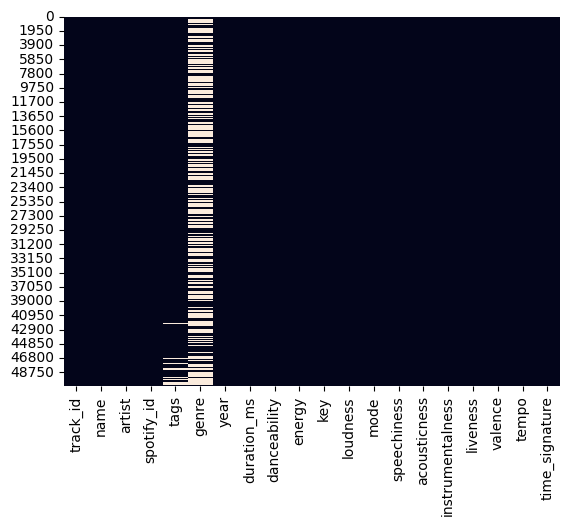

In [13]:
sns.heatmap(song_df.isnull(), cbar=False)

### duplicated values
- There are 815 duplicate rows based on the name of the song
- 9 Duplicate songs in the data based on the spotify_id,year,duration_ms

In [14]:
song_df.head(2)

,track_id,name,artist,spotify_id,tags,genre,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,0.918,1,-4.360,1,0.0746,0.001190,0.0,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,0.892,2,-4.373,1,0.0336,0.000807,0.0,0.2070,0.651,174.426,4


In [15]:
song_df['name']= song_df['name'].str.lower()

In [16]:
song_df.duplicated(subset=('name')).sum()

np.int64(815)

In [17]:
song_df.duplicated(subset=('spotify_id')).sum()

np.int64(9)

In [18]:
song_df.duplicated(subset=['spotify_id','year','duration_ms']).sum()

np.int64(9)

In [19]:
song_df[song_df.duplicated(["spotify_id", "year", "duration_ms"], keep=False)].sort_values(["spotify_id", "year", "duration_ms"])

,track_id,name,artist,spotify_id,tags,genre,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
15326,TRJNHPN128F92EF139,adagio for strings,Samuel Barber,00otCiz9kUb3Vg7LPKNCZG,"instrumental, classical, soundtrack, beautiful",NaN,2014,431412,0.140,0.0947,10,-18.599,0,0.0458,0.97800,0.478000,0.0735,0.0365,84.560,4
21570,TRLSRQD128F426CFF8,"adagio for strings, op. 11",Samuel Barber,00otCiz9kUb3Vg7LPKNCZG,classical,NaN,2014,431412,0.140,0.0947,10,-18.599,0,0.0458,0.97800,0.478000,0.0735,0.0365,84.560,4
14861,TRLOZQZ128F92E8A3F,how do you want it,2Pac,02VsIBmSkhc7uHNyPViZR3,"rap, hip_hop",NaN,2011,289000,0.832,0.7850,8,-2.859,1,0.0930,0.11100,0.000007,0.0623,0.8120,92.468,4
14981,TRXHJQY128F42B5094,how do u want it,2Pac,02VsIBmSkhc7uHNyPViZR3,"rap, hip_hop, american",Rap,2011,289000,0.832,0.7850,8,-2.859,1,0.0930,0.11100,0.000007,0.0623,0.8120,92.468,4
37040,TRGCZFO128F92EE221,je pense à toi,Amadou & Mariam,09jsAIZF9ThihIzdrw4KAS,"alternative, beautiful, french",NaN,2005,316880,0.680,0.3990,11,-11.585,0,0.0279,0.74900,0.001610,0.1580,0.8280,106.349,4
49162,TRZBNQU128F148C04F,je pense a toi,Amadou & Mariam,09jsAIZF9ThihIzdrw4KAS,NaN,NaN,2005,316880,0.680,0.3990,11,-11.585,0,0.0279,0.74900,0.001610,0.1580,0.8280,106.349,4
13427,TRJQFIT128E0781CED,too much too young,The Specials,0ndKJL8gA4zLl317M7vndn,"punk, 80s, new_wave, reggae, ska",NaN,2012,116160,0.597,0.8390,2,-9.052,1,0.0471,0.44700,0.000134,0.3100,0.9650,156.058,4
46512,TRDTUTO128F422F138,too much too young (live),The Specials,0ndKJL8gA4zLl317M7vndn,ska,NaN,2012,116160,0.597,0.8390,2,-9.052,1,0.0471,0.44700,0.000134,0.3100,0.9650,156.058,4
1684,TRRZUGN128F42A1EEE,there there,Radiohead,0thdzbW0cRKCx12VbBRB6T,"rock, electronic, alternative, indie, alternat...",Rock,2008,323600,0.614,0.6770,9,-8.317,0,0.0323,0.01930,0.518000,0.1080,0.7170,126.477,4
2983,TRXFHCL128F92E0989,"there, there",Radiohead,0thdzbW0cRKCx12VbBRB6T,"rock, electronic, alternative, indie, alternat...",NaN,2008,323600,0.614,0.6770,9,-8.317,0,0.0323,0.01930,0.518000,0.1080,0.7170,126.477,4


In [20]:
# now drop duplicated data
song_df.drop_duplicates(subset=['spotify_id','year','duration_ms'],inplace=True)

In [21]:
song_df.shape

(50674, 20)

### Column Wise Analysis

In [22]:
song_df.dtypes

,0
track_id,object
name,object
artist,object
spotify_id,object
tags,object
genre,object
year,int64
duration_ms,int64
danceability,float64
energy,float64


In [23]:
song_df.columns

Index(['track_id', 'name', 'artist', 'spotify_id', 'tags', 'genre', 'year',
       'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')

In [24]:
categorical_columns = song_df.select_dtypes(include='object').columns
categorical_columns

Index(['track_id', 'name', 'artist', 'spotify_id', 'tags', 'genre'], dtype='object')

In [25]:
def categorical_analysis(df,feature_names,k_artists=15):
    for feature in feature_names:
        print(f"Number of categories in column {feature} are ",df[feature].str.lower().nunique())

        if feature in ["artist","genre"]:
            print(df[feature].value_counts().head(k_artists))

        if feature == "genre":
            print(f"The unique categories in {feature} column are: ", df[feature].dropna().unique())
        print("#" * 75)

In [26]:

# perform catagorical analysis

categorical_analysis(song_df,categorical_columns)

Number of categories in column track_id are  50674
###########################################################################
Number of categories in column name are  49860
###########################################################################
Number of categories in column artist are  8317
artist
The Rolling Stones    132
Radiohead             110
Autechre              105
Tom Waits             100
Bob Dylan              98
The Cure               94
Metallica              85
Johnny Cash            84
Nine Inch Nails        83
Sonic Youth            81
Iron Maiden            76
In Flames              76
Elliott Smith          76
Mogwai                 75
Boards of Canada       75
Name: count, dtype: int64
###########################################################################
Number of categories in column spotify_id are  50674
###########################################################################
Number of categories in column tags are  20054
###########################

Observations:

- The `Track ID` and `Spotify ID's` are unique for every row.
- The song `names` have some repititions. That is because there are a few songs in the data whose name is the same but is sung by a different artist.
- The dataset contains songs of about 8317 `artists`.
- There are 15 distinct categories in the `Genre` column.

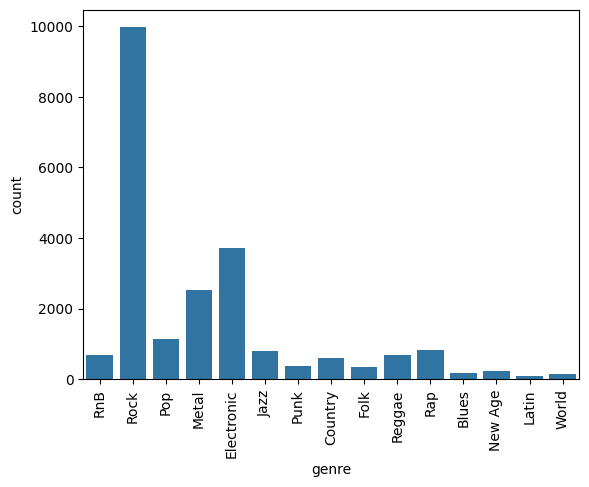

In [28]:
sns.countplot(song_df,x='genre')
plt.xticks(rotation=90)
plt.show()

In [34]:
song_df.groupby('genre')[['genre','tags']].sample(3)

,genre,tags
44204,Blues,"blues, blues_rock"
23837,Blues,blues
23898,Blues,blues
12650,Country,"female_vocalists, folk, soundtrack, country, b..."
33217,Country,country
33401,Country,country
21948,Electronic,"ambient, chillout, classical, idm"
32224,Electronic,"electronic, electro"
26311,Electronic,"electronic, post_rock"
6719,Folk,"indie, female_vocalists, folk, singer_songwrit..."
